In [1]:
# packages and modules required are loaded here

import pandas as pd
import numpy as np
import datetime as dt

#  visualizatio
import matplotlib.pyplot as plt
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots

import mplfinance as mpf

## DATA PREPROCESSING

### we are using NIFTY 50.csv , it comprises The NIFTY 50 is a **benchmark** Indian stock market index that represents the weighted average of 50 of the largest Indian companies listed on the National Stock Exchange. It is one of the two main stock indices used in India

In [2]:
nifty50_df = pd.read_csv('../datasets/inidices/NIFTY 50.csv')

nifty50_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Turnover'], dtype='object')

In [3]:
nifty50_df.shape

(7510, 7)

In [4]:
nifty50_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7510 entries, 0 to 7509
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      7510 non-null   object 
 1   Open      7510 non-null   float64
 2   High      7510 non-null   float64
 3   Low       7510 non-null   float64
 4   Close     7510 non-null   float64
 5   Volume    6097 non-null   float64
 6   Turnover  6097 non-null   float64
dtypes: float64(6), object(1)
memory usage: 410.8+ KB


### From the volume and Turnover columns we see that they have null values as Stock inception in India is on 1995-11-03 
- for practical purposes and to take into account factors like inflation,recession period,etc it makes sense to consider tuples from 2005-present
    - covers pre and post recession period (dataset starting point 2000-01-03 )
    - so to be consistent we also do a similar numerosity reduction for the other assets(gold) , and also for the other indices being used

In [5]:
start = nifty50_df[nifty50_df['Date']=='2000-01-03'].index[0]
# start
nifty50_df = nifty50_df[start:]

nifty50_df.head

<bound method NDFrame.head of             Date      Open      High       Low     Close       Volume  \
2161  2000-01-03   1482.15   1592.90   1482.15   1592.20   25358322.0   
2162  2000-01-04   1594.40   1641.95   1594.40   1638.70   38787872.0   
2163  2000-01-05   1634.55   1635.50   1555.05   1595.80   62153431.0   
2164  2000-01-06   1595.80   1639.00   1595.80   1617.60   51272875.0   
2165  2000-01-07   1616.60   1628.25   1597.20   1613.30   54315945.0   
...          ...       ...       ...       ...       ...          ...   
7505  2021-06-25  15839.35  15870.80  15772.30  15860.35  314614380.0   
7506  2021-06-28  15915.35  15915.65  15792.15  15814.70  255099272.0   
7507  2021-06-29  15807.50  15835.90  15724.05  15748.45  360334724.0   
7508  2021-06-30  15776.90  15839.10  15708.75  15721.50  262386323.0   
7509  2021-07-01  15755.05  15755.55  15667.05  15680.00  224921644.0   

          Turnover  
2161  8.841500e+09  
2162  1.973690e+10  
2163  3.084790e+10  
2164  2.5

In [6]:
nifty50_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5349 entries, 2161 to 7509
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5349 non-null   object 
 1   Open      5349 non-null   float64
 2   High      5349 non-null   float64
 3   Low       5349 non-null   float64
 4   Close     5349 non-null   float64
 5   Volume    5349 non-null   float64
 6   Turnover  5349 non-null   float64
dtypes: float64(6), object(1)
memory usage: 292.7+ KB


### Similarly for the other datasets we are using we go for Numerosity reduction(start of time:2000-01-03) for the above mentioned reasons

In [7]:
niftyAuto_df = pd.read_csv('../datasets/inidices/NIFTY AUTO.csv')
start = niftyAuto_df[niftyAuto_df['Date']=='2005-01-03'].index[0]
niftyAuto_df = niftyAuto_df[start:]


niftyBank_df = pd.read_csv('../datasets/inidices/NIFTY BANK.csv')
start = niftyBank_df[niftyBank_df['Date']=='2005-01-03'].index[0]
niftyBank_df = niftyBank_df[start:]

niftyIT_df = pd.read_csv('../datasets/inidices/NIFTY IT.csv')
start = niftyIT_df[niftyIT_df['Date']=='2005-01-03'].index[0]
niftyIT_df = niftyIT_df[start:]

niftyFin_Services_df = pd.read_csv('../datasets/inidices/NIFTY FIN SERVICE.csv')
start = niftyFin_Services_df[niftyFin_Services_df['Date']=='2005-01-03'].index[0]
niftyFin_Services_df = niftyFin_Services_df[start:]



niftyPharma_df = pd.read_csv('../datasets/inidices/NIFTY PHARMA.csv')
start = niftyPharma_df[niftyPharma_df['Date']=='2005-01-03'].index[0]
niftyPharma_df = niftyPharma_df[start:]


print("Auto index info:\n")
niftyAuto_df.info()


Auto index info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4092 entries, 254 to 4345
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4092 non-null   object 
 1   Open      2414 non-null   float64
 2   High      2414 non-null   float64
 3   Low       2414 non-null   float64
 4   Close     4092 non-null   float64
 5   Volume    2461 non-null   float64
 6   Turnover  2461 non-null   float64
dtypes: float64(6), object(1)
memory usage: 223.9+ KB


### The difference in non-null count b/w date and open indicates null values : Here Numerosity reduction is preferred as at these dates(old) ,
-  data wasn't collected for AUTO SECTOR, for daily open/ high / low / volume. 
- So during analysis we must just ignore those tuples ( which are before 2011 - seen by inspection)
- we can prefer to use CLOSE attr for EDA only, analysis for this data can be done only using close data again

In [8]:

print("\n\nBank index info:\n")
niftyBank_df.info()



Bank index info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4092 entries, 1258 to 5349
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4092 non-null   object 
 1   Open      3982 non-null   float64
 2   High      3982 non-null   float64
 3   Low       3982 non-null   float64
 4   Close     4092 non-null   float64
 5   Volume    4082 non-null   float64
 6   Turnover  4082 non-null   float64
dtypes: float64(6), object(1)
memory usage: 223.9+ KB


print("\n\nIT index info:\n")
niftyIT_df.info()

### There is a similar problem(Like the one in AUTO) with BANK Sector data as well
- So we prefer to just use the close attr again.

In [9]:
print("\n\nFin_Services index info:\n")
niftyFin_Services_df.info()



Fin_Services index info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4092 entries, 254 to 4345
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4092 non-null   object 
 1   Open      2315 non-null   float64
 2   High      2315 non-null   float64
 3   Low       2315 non-null   float64
 4   Close     4092 non-null   float64
 5   Volume    2417 non-null   float64
 6   Turnover  2417 non-null   float64
dtypes: float64(6), object(1)
memory usage: 223.9+ KB


### There is a similar problem(Like the one in AUTO) with Fin_Services Sector data as well
- So we prefer to just use the close attr again.

In [10]:
print("\n\nPharma index info:\n")
niftyPharma_df.info()



Pharma index info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4092 entries, 1007 to 5098
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4092 non-null   object 
 1   Open      2583 non-null   float64
 2   High      2583 non-null   float64
 3   Low       2583 non-null   float64
 4   Close     4092 non-null   float64
 5   Volume    3959 non-null   float64
 6   Turnover  3959 non-null   float64
dtypes: float64(6), object(1)
memory usage: 223.9+ KB


### There is a similar problem(Like the one in AUTO) with Pharma Sector data as well
- So we prefer to just use the close attr again.

In [11]:
#  We have the start point from 2009-12-01
goldPrices_df = pd.read_csv('../datasets/gold_prices.csv')

# need to reverse the dataset as last row has oldest date
goldPrices_df = goldPrices_df[::-1]

print("\n\nGold prices info:\n")
goldPrices_df.info()



Gold prices info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1660 entries, 1659 to 0
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       1660 non-null   object 
 1   Open                       1660 non-null   float64
 2   High                       1660 non-null   float64
 3   Low                        1660 non-null   float64
 4   Close                      1660 non-null   float64
 5   WAP                        1660 non-null   float64
 6   No. of Shares              1660 non-null   float64
 7   No. of Trades              1660 non-null   float64
 8   Total Turnover             1660 non-null   float64
 9   Deliverable Quantity       1660 non-null   float64
 10  % Deli. Qty to Traded Qty  1660 non-null   float64
 11  Spread H-L                 1660 non-null   float64
 12  Spread C-O                 1660 non-null   float64
dtypes: float64(12), object(1)
m

### The data source for gold prices has given us perfectly clean data

## All data has been preprocessed, we can move to Descriptive Analytics

### DATA Attribute types:
- **The Open and Close columns** indicate the opening and closing price of the stocks on a particular day.                  *(CONTINUOUS Ratio val)*
- **The High and Low columns** provide the highest and the lowest price for the stock on a particular day, respectively     *(CONTINUOUS Ratio val)*
- **The Volume column** tells us the total volume of stocks traded on a particular day.                                     *(CONTINUOUS Ratio val)*
- **The Turnover column** refers to the total value of stocks traded during a specific period of time.                      *(CONTINUOUS Ratio val)*
                (The time period may be annually, quarterly, monthly or daily)

### we plan to use the indices(as of now part of different dataframes) as *categorical* values : BANk , AUTO ,IT, Bullion(gold prices)





In [12]:
# Use this for fair comparison of trend and f
def normalize(df):
    result = df.copy()
    
    try:
        result['Close'] = pd.to_numeric(result['Close']).copy()
        max_value = result['Close'].max()
        min_value = result['Close'].min()
        result['Close'] = (df['Close'] - min_value) / (max_value - min_value)

    except :
        return df
    else :
        return result

## Use Min-Max normailization for a fair comparion of trends and fluctuations

## Comparing Sector Indices with companies in that sector

### TCS and INFY vs NIFTY IT(Benchmark)

In [13]:
infy_df = pd.read_csv("../datasets/companies/INFY.csv")
start = infy_df[infy_df['Date']=='2005-01-03'].index[0]
infy_df = infy_df[start:]

tcs_df = pd.read_csv("../datasets/companies/TCS.csv")
start = tcs_df[tcs_df['Date']=='2005-01-03'].index[0]
tcs_df = tcs_df[start:]

norm1 = normalize(niftyIT_df)
norm2 = normalize(infy_df)
norm3 = normalize(tcs_df)


fig = go.Figure()
        

fig.add_trace(go.Scatter(
         x=norm1['Date'],
         y=norm1['Close'],
        name='IT',
        line=dict(color='blue'),
    opacity=1))        

fig.add_trace(go.Scatter(
         x=norm2['Date'],
         y=norm2['Close'],
        name='Infy',
        line=dict(color='green'),
    opacity=1))

fig.add_trace(go.Scatter(
         x=norm3['Date'],
         y=norm3['Close'],
        name='Tcs',
        line=dict(color='pink'),
    opacity=1))
    
fig.update_layout(title_text="IT sector comparison", xaxis_title = 'Year', yaxis_title='Value')

fig.show()

## ADD INSIGHTS FOR ABOVE PLOT
- **Infosys** has a taken a hit because it took a while to replace the CEO, and the public perception to new CEO and his ideas also weren't that good

## BAJAJ-Auto and TATAMOTORS vs AUTO index(benchmark)

In [14]:
bajaj_df = pd.read_csv("../datasets/companies/BAJAJ-AUTO.csv")
start = bajaj_df[bajaj_df['Date']=='2008-05-26'].index[0]
bajaj_df = bajaj_df[start:]

tatamotors_df = pd.read_csv("../datasets/companies/TATAMOTORS.csv")
start = tatamotors_df[tatamotors_df['Date']=='2008-05-26'].index[0]
tatamotors_df = tatamotors_df[start:]

norm1 = normalize(niftyAuto_df[niftyAuto_df['Date']>='2008-05-26'])
norm2 = normalize(bajaj_df)
norm3 = normalize(tatamotors_df)


fig = go.Figure()
        

fig.add_trace(go.Scatter(
         y=norm1['Close'],
         x=norm1['Date'],
        name='AUTO',
        line=dict(color='blue'),
    opacity=1))        

fig.add_trace(go.Scatter(
         x=norm2['Date'],
         y=norm2['Close'],
        name='Bajaj',
        line=dict(color='green'),
    opacity=1))

fig.add_trace(go.Scatter(
         x=norm3['Date'],
         y=norm3['Close'],
        name='Tata motors',
        line=dict(color='pink'),
    opacity=1))
    
fig.update_layout(title_text="Auto sector comparison", xaxis_title = 'Year', yaxis_title='Value')

fig.show()

## ADD INSIGHTS FOR ABOBE PLOT
- Clearly BAJAJ is the big dog in Auto sector, as it always matches or beats the benchmark

## PFizer and PANACEABIO vs Pharma index(benchmark)

### it makes sense to analyse the Pharma sector first with other sectors during covid season(2019-present)

In [15]:
niftyAuto_covid = niftyAuto_df[(niftyAuto_df['Date'] >= '2019-01-01')]
niftyBank_covid = niftyBank_df[(niftyBank_df['Date'] >= '2019-01-01')]
niftyIT_covid = niftyIT_df[(niftyIT_df['Date'] >= '2019-01-01')]
niftyFin_Services_covid = niftyFin_Services_df[(niftyFin_Services_df['Date'] >= '2019-01-01')]
niftyPharma_covid = niftyPharma_df[(niftyPharma_df['Date'] >= '2019-01-01')]


norm1 = normalize(niftyAuto_covid)
norm2 = normalize(niftyBank_covid)
norm3 = normalize(niftyIT_covid)
norm4 = normalize(niftyFin_Services_covid)
norm5 = normalize(niftyPharma_covid)


fig = go.Figure()

fig = make_subplots(rows=3, cols=2,
        subplot_titles=("AUTO", " Bank", "IT", "Fin services", "Pharma"," ")
        
)

fig.add_trace(go.Scatter(
         x=norm1['Date'],
         y=norm1['Close']),
    
        row=1, col=1)        

fig.add_trace(go.Scatter(
         x=norm2['Date'],
         y=norm2['Close']),

        row=1, col=2)


fig.add_trace(go.Scatter(
         x=norm3['Date'],
         y=norm3['Close']),
        row=2, col=1)


fig.add_trace(go.Scatter(
         x=norm4['Date'],
         y=norm4['Close']),
        row=2, col=2)


fig.add_trace(go.Scatter(
         x=norm5['Date'],
         y=norm5['Close']),
        row=3,col=1)



    
fig.update_layout(title_text="Covid Season Trends of sectors")

fig.show()

## What we see is PHARMA sector as well as IT Sectors have seen a positive growth in the SHARE prices
## Whereas Sectors like AUTO, BANK, Fin Services all out-performed IT and Pharma sector(in normalized scale-that is growth rate) before the 3rd lockdown
- now seen a dip, but have recovered well (this may be the sector recovering, doesn't mean individual companies have recovered too this might be just due to the big players) 
- IT sector has seen a boom because all of us are trying to connect to each other digitally ( meeting calls/ mails/ drive/ etc)
- Pharma sector has seen a boom because of the vaccine-season as well as other essential drugs to reduce the spread of the virus

## PFizer and PANACEABIO vs Pharma index(benchmark) - (CONTINUATION)
- the comparison can be done from 2005 
- PFIZER : Pfizer vaccine
- PANACEBIO : parent of serum ltd: Covidsheild

In [16]:
pfizer_df = pd.read_csv("../datasets/companies/PFIZER.csv")
start = pfizer_df[pfizer_df['Date']=='2005-01-03'].index[0]
pfizer_df = pfizer_df[start:]

panaceaBio_df = pd.read_csv("../datasets/companies/PANACEABIO.csv")
start = panaceaBio_df[panaceaBio_df['Date']=='2005-01-03'].index[0]
panaceaBio_df = panaceaBio_df[start:]

norm1 = normalize(niftyPharma_df[niftyPharma_df['Date']>='2005-01-03'])
norm2 = normalize(pfizer_df)
norm3 = normalize(panaceaBio_df)


fig = go.Figure()
        

fig.add_trace(go.Scatter(
         y=norm1['Close'],
         x=norm1['Date'],
        name='Pharma',
        line=dict(color='blue'),
    opacity=1))        

fig.add_trace(go.Scatter(
         x=norm2['Date'],
         y=norm2['Close'],
        name='Pfizer',
        line=dict(color='green'),
    opacity=1))

fig.add_trace(go.Scatter(
         x=norm3['Date'],
         y=norm3['Close'],
        name='PanaceaBio',
        line=dict(color='pink'),
    opacity=1))
    
fig.update_layout(title_text="Pharma sector comparison(2005+)", xaxis_title = 'Year', yaxis_title='Value')

fig.show()

## ADD INSIGHTS FOR ABOVE PLOT
- 

## Trend during Covid (2019+) for PHARMA SECTOR ( COMPARIZON OF companies with benchmark)

In [17]:
norm1 = normalize(pfizer_df[pfizer_df['Date']>='2019-01-01'])
norm2 = normalize(panaceaBio_df[panaceaBio_df['Date']>='2019-01-01'])
norm3 = normalize(niftyPharma_covid)

fig = go.Figure()
        

fig.add_trace(go.Scatter(
         y=norm1['Close'],
         x=norm1['Date'],
        name='Pharma',
        line=dict(color='blue'),
    opacity=1))        

fig.add_trace(go.Scatter(
         x=norm2['Date'],
         y=norm2['Close'],
        name='Pfizer',
        line=dict(color='green'),
    opacity=1))

fig.add_trace(go.Scatter(
         x=norm3['Date'],
         y=norm3['Close'],
        name='PanaceaBio',
        line=dict(color='pink'),
    opacity=1))
    
fig.update_layout(title_text="Pharma sector comparison(COVID(2019+))", xaxis_title = 'Year', yaxis_title='Value')

fig.show()

## ADD ANY INSIGHTS For above plot
- Looks like more people trust COVIDSHIELD over PFIZER so PanaceaBio share prices are better than Pfizer

## Some Insights can be gained through EDA itself, which is done below

### 1) Trends observed because of/during the Great Recession (2008)


In [18]:
nifty50_2008_to_2010 = nifty50_df[(nifty50_df['Date'] >= '2008-01-01') & (nifty50_df['Date'] <= '2010-12-31')]
fig = go.Figure()
fig.add_trace(go.Scatter(
         x=nifty50_2008_to_2010['Date'],
         y=nifty50_2008_to_2010['Low'],
         name='Price',
    line=dict(color='red'),
    opacity=1))
        
    
fig.update_layout(title_text="NIFTY-50 Trend (2008 - 2010)", xaxis_title = 'Year', yaxis_title='Value')

fig.show()

### We see from this figure that in general the stock market has recovered from losses around/after Jul 2010
- this is because India is a developing country and did not soley depend on trades,etc
- ADD POINTS

### Sector wise comparison of trend during recession

In [21]:
niftyBank_2008_to_2010 = niftyBank_df[(niftyBank_df['Date'] >= '2008-01-01') & (niftyBank_df['Date'] <= '2010-12-31')]
niftyIT_2008_to_2010 = niftyIT_df[(niftyIT_df['Date'] >= '2008-01-01') & (niftyIT_df['Date'] <= '2010-12-31')]
niftyAuto_2008_to_2010 = niftyAuto_df[(niftyAuto_df['Date'] >= '2008-01-01') & (niftyAuto_df['Date'] <= '2010-12-31')]
niftyFin_Services_2008_to_2010 = niftyFin_Services_df[(niftyFin_Services_df['Date'] >= '2008-01-01') & (niftyFin_Services_df['Date'] <= '2010-12-31')]
niftyPharma_2008_to_2010 = niftyPharma_df[(niftyPharma_df['Date'] >= '2008-01-01') & (niftyPharma_df['Date'] <= '2010-12-31')]

fig = go.Figure()
fig.add_trace(go.Scatter(
         x=niftyBank_2008_to_2010['Date'],
         y=niftyBank_2008_to_2010['Close'],
        name='Bank',
        line=dict(color='orange'),
    opacity=1))

fig.add_trace(go.Scatter(
         x=niftyIT_2008_to_2010['Date'],
         y=niftyIT_2008_to_2010['Close'],
        name='IT',
        line=dict(color='blue'),
    opacity=1))        

fig.add_trace(go.Scatter(
         x=niftyAuto_2008_to_2010['Date'],
         y=niftyAuto_2008_to_2010['Close'],
        name='Auto',
        line=dict(color='green'),
    opacity=1))

fig.add_trace(go.Scatter(
         x=niftyFin_Services_2008_to_2010['Date'],
         y=niftyFin_Services_2008_to_2010['Close'],
        name='Fin_Services',
        line=dict(color='pink'),
    opacity=1))

fig.add_trace(go.Scatter(
         x=niftyPharma_2008_to_2010['Date'],
         y=niftyPharma_2008_to_2010['Close'],
        name='Fin_Services',
        line=dict(color='pink'),
    opacity=1))
    
fig.update_layout(title_text="NIFTY-50 Trend (2008 - 2010)", xaxis_title = 'Year', yaxis_title='Value')

fig.show()

### From the above plot we can clearly see that:
- all sectors got hit, but Auto sector in particular has been affected the most
- Banking Sector has the quickest recovery

- **India**being a **developing** country had recovered faster than developed countries which was seen from NIFTY-50 Trend fig, so all sectors have recovered by JULY 2010 (roughly)

!- DO SIMILAR THING FOR COVID TIME FRAME

## EDA can also be used to see the bullish/bearish patterns to see if to invest or not as a first thought without any analysis(that is prediction models)


### Let's assume that post covid people want to avoid public transport(Global warming JAI) and buy their own vehicles to commute
### It would be considered as a good time to invest in any company in the AUTO sector


## First Let's see the chart of the AUTO Index for post covid(HOPEFULLY) {2021}

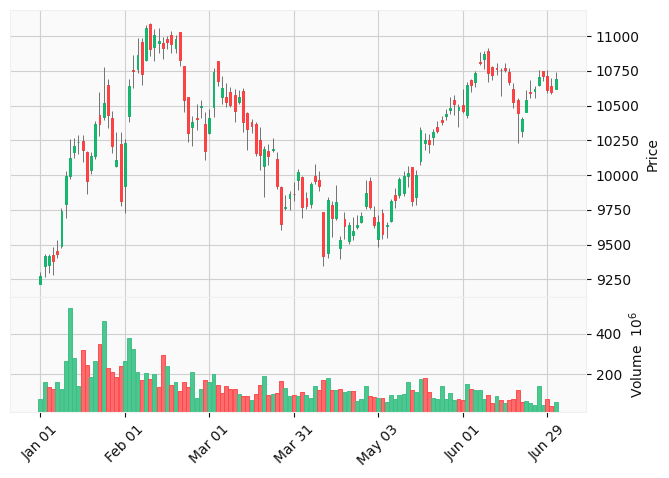

In [20]:
niftyAuto_recent = niftyAuto_df[niftyAuto_df['Date'] > '2020-12-31'].copy()    # all data of 2021

niftyAuto_recent['Date'] = pd.to_datetime(niftyAuto_recent['Date'])

data = niftyAuto_recent[['Date','Open','High','Low','Close','Volume']]
data.set_index('Date',inplace=True)
mpf.plot(data , type="candle", style="yahoo",volume=True)

# mpf.plot.styles

## Some Observations
 - clearly at the start of the year we see **Bearish** patterns(open < close price), so an investor if he/she bought shares during 1st week of Jan
    - let's assume be magic he/she got to know that there would be a dip at mid Feb and chose to sell, This would be a great investment
 - The investment during this period can be categorized as **Bearish** , so the expected returns from stock would be greater than FD, or real-estate or bullion(gold) during the same time-period.

- **CANDLE CHARTS** can clearly capture the fluctuations caused by external factors(covid-19) which can be seen in the above example


## On a similar line we can also see the impact on a political decision, and decide if it is likely to impact the stock market bearishly/bullishly